In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# 0D parameters
cols_0D = [
    '\\q0', '\\q95', '\\ipmhd', '\\kappa', 
    '\\tritop', '\\tribot','\\betap','\\betan',
    '\\li', '\\WTOT_DLM03', '\\ne_inter01',
    '\\TS_NE_CORE_AVG', '\\TS_TE_CORE_AVG'
]

# else diagnostics
cols_diag = [
    '\\ne_inter01', '\\ne_tci01', '\\ne_tci02', '\\ne_tci03', '\\ne_tci04', '\\ne_tci05',
]

# control value / parameter
cols_control = [
    '\\nb11_pnb','\\nb12_pnb','\\nb13_pnb',
    '\\RC01', '\\RC02', '\\RC03',
    '\\VCM01', '\\VCM02', '\\VCM03',
    '\\EC2_PWR', '\\EC3_PWR', 
    '\\ECSEC2TZRTN', '\\ECSEC3TZRTN',
    '\\LV01'
]

# original data
df = pd.read_csv("./dataset/KSTAR_Disruption_ts_data.csv").reset_index(drop = True)

# after some preprocessing 
df_extend = pd.read_csv("./dataset/KSTAR_Disruption_ts_data_extend.csv").reset_index(drop = True)

# information about disruption
df_disruption = pd.read_csv("./dataset/KSTAR_Disruption_Shot_List.csv", encoding='euc-kr').reset_index(drop = True)

# nan interpolation
df = df.interpolate(method = 'linear', limit_direction = 'forward').reset_index(drop = True)

# columns for use
ts_cols = cols_0D + cols_control

In [39]:
print("df_extend, shot num : ", len(df_extend.shot.unique()))
print("df, shot num : ", len(df.shot.unique()))

df_extend, shot num :  725
df, shot num :  969


In [40]:
print("dataset size : ", len(df_extend))

dataset size :  419473


In [28]:
df_extend.head()

,time,shot,\q0,\q95,\ipmhd,\kappa,\tritop,\tribot,\betap,\betan,...,\TS_EDGE10:EDGE10_NE,\TS_EDGE11:EDGE11_NE,\TS_EDGE12:EDGE12_NE,\TS_EDGE13:EDGE13_NE,\TS_EDGE14:EDGE14_NE,\TS_EDGE15:EDGE15_NE,\TS_NE_CORE_AVG,\TS_NE_EDGE_AVG,\TS_TE_CORE_AVG,\TS_TE_EDGE_AVG
0,1.300000,15150,1.140898,3.330253,632867.112702,1.379301,0.187634,0.187634,0.499783,0.895435,...,0.166292,0.0,0.082853,0.0,0.083381,0.0,2.466017,0.519558,1.920348,0.750526
1,1.305294,15150,1.130374,3.317354,633870.409122,1.378305,0.187276,0.187276,0.497370,0.893660,...,0.167034,0.0,0.081092,0.0,0.077870,0.0,2.486828,0.522411,1.914570,0.702329
2,1.310783,15150,1.119463,3.303980,634910.679000,1.377272,0.186903,0.186903,0.494868,0.891819,...,0.167804,0.0,0.079267,0.0,0.072155,0.0,2.508407,0.525369,1.908580,0.652355
3,1.316467,15150,1.108166,3.290134,635987.677509,1.376202,0.186518,0.186518,0.492277,0.889913,...,0.168600,0.0,0.077379,0.0,0.066239,0.0,2.530749,0.528431,1.902377,0.600616
4,1.322342,15150,1.096488,3.275820,637101.053089,1.375097,0.186120,0.186120,0.489599,0.887942,...,0.169424,0.0,0.075426,0.0,0.060123,0.0,2.553844,0.531597,1.895966,0.547129


In [29]:
df_extend[cols_0D].describe()

,\q0,\q95,\ipmhd,\kappa,\tritop,\tribot,\betap,\betan,\li,\WTOT_DLM03,\ne_inter01,\TS_NE_CORE_AVG,\TS_TE_CORE_AVG
count,419473.000000,419473.000000,419473.000000,419473.000000,419473.000000,419473.000000,4.194730e+05,4.194730e+05,419473.000000,419473.000000,419473.000000,419473.000000,419473.000000
mean,1.527368,5.431759,522248.790562,1.698539,0.376870,0.715226,1.219535e+00,1.408673e+00,1.130157,223.148187,9.750708,1.852728,1.880761
std,0.588198,1.426943,92745.858486,0.110135,0.131237,0.167716,6.350910e-01,6.879033e-01,0.201019,118.766390,14.334106,1.443053,0.850627
min,0.551858,2.144382,321077.272053,1.111522,-0.038905,0.055383,2.342185e-12,3.683442e-12,0.525382,0.000000,0.000000,0.000000,0.000000
25%,1.129718,4.625399,474475.735359,1.659937,0.302137,0.681850,6.350434e-01,7.965854e-01,0.979988,136.906925,3.292962,0.468161,1.280344
50%,1.401621,5.157640,495302.132062,1.712027,0.356196,0.751018,1.300588e+00,1.540958e+00,1.067659,214.477765,5.390151,1.911258,1.839320
75%,1.720496,5.860464,558346.805368,1.763398,0.427603,0.833187,1.688357e+00,1.914031e+00,1.283287,286.299215,9.973633,2.876998,2.405115
max,8.574844,12.948083,962330.491130,2.130713,0.895609,0.943445,3.477092e+00,3.349888e+00,1.937478,882.658291,157.421088,9.986813,5.518505


In [30]:
df_extend[cols_control].describe()

,\nb11_pnb,\nb12_pnb,\nb13_pnb,\RC01,\RC02,\RC03,\VCM01,\VCM02,\VCM03,\EC2_PWR,\EC3_PWR,\ECSEC2TZRTN,\ECSEC3TZRTN,\LV01
count,419473.000000,419473.000000,419473.000000,419473.000000,4.194730e+05,4.194730e+05,4.194730e+05,4.194730e+05,4.194730e+05,419473.000000,419473.000000,419473.000000,419473.000000,419473.000000
mean,0.987493,0.717615,0.507814,-515351.777275,4.013727e+05,-5.452523e+05,-1.513560e+05,4.494789e+05,-5.780508e+05,782.029466,73.839683,0.330629,0.249064,-0.296368
std,0.714256,0.718231,0.727360,106069.152493,3.043988e+05,1.133650e+05,1.046139e+06,5.925504e+05,1.193002e+05,19776.558485,180.809421,5.986666,2.881287,0.415597
min,0.000270,-0.025874,-0.002537,-963272.752399,-1.035234e+06,-1.017444e+06,-1.029583e+07,-3.607299e+06,-1.088469e+06,-2781.086886,0.000000,-28.198236,-16.771458,-3.467201
25%,0.000525,0.002570,0.000023,-566270.994912,1.191727e+05,-6.026968e+05,-5.006545e+05,2.060110e+05,-6.366790e+05,0.054763,0.000000,-0.005526,0.000000,-0.476587
50%,1.247273,0.997436,0.000105,-495454.452469,5.244868e+05,-5.235869e+05,0.000000e+00,5.493630e+05,-5.523334e+05,9.753823,0.000000,0.000000,0.000000,-0.212801
75%,1.682639,1.376672,1.163639,-470169.536858,5.734559e+05,-4.981673e+05,0.000000e+00,5.984111e+05,-5.285737e+05,598.505967,5.929055,0.000000,0.000000,-0.056109
max,1.738588,1.878585,2.031058,6535.342906,3.573192e+06,-5.067975e+03,1.080357e+07,1.270991e+07,3.071945e+04,764402.325988,698.055388,43.094707,24.973217,2.589395


In [31]:
# control value
print(cols_control)

['\\nb11_pnb', '\\nb12_pnb', '\\nb13_pnb', '\\RC01', '\\RC02', '\\RC03', '\\VCM01', '\\VCM02', '\\VCM03', '\\EC2_PWR', '\\EC3_PWR', '\\ECSEC2TZRTN', '\\ECSEC3TZRTN', '\\LV01']


shot num : 21747


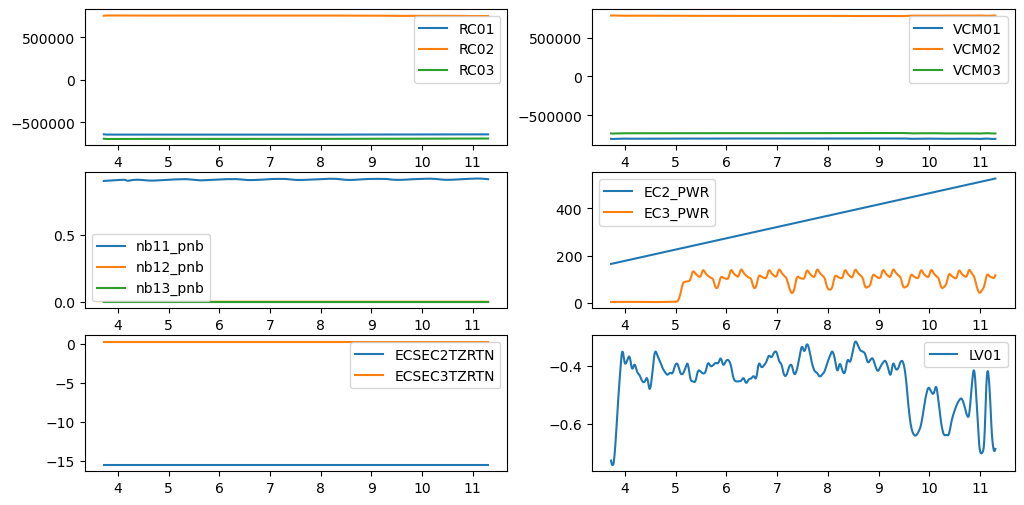

In [32]:
# monitoring arbitrary shot
shot_num = df_extend.shot.unique()[-1]
df_shot = df_extend[df_extend.shot == shot_num]

print("shot num : {}".format(shot_num))

import matplotlib.pyplot as plt

fig, axes = plt.subplots(3,2,figsize = (12,6))
axes = axes.ravel()

axes[0].plot(df_shot['time'], df_shot['\\RC01'], label = 'RC01')
axes[0].plot(df_shot['time'], df_shot['\\RC02'], label = 'RC02')
axes[0].plot(df_shot['time'], df_shot['\\RC03'], label = 'RC03')
axes[0].legend()

axes[1].plot(df_shot['time'], df_shot['\\VCM01'], label = 'VCM01')
axes[1].plot(df_shot['time'], df_shot['\\VCM02'], label = 'VCM02')
axes[1].plot(df_shot['time'], df_shot['\\VCM03'], label = 'VCM03')
axes[1].legend()

axes[2].plot(df_shot['time'], df_shot['\\nb11_pnb'], label = 'nb11_pnb')
axes[2].plot(df_shot['time'], df_shot['\\nb12_pnb'], label = 'nb12_pnb')
axes[2].plot(df_shot['time'], df_shot['\\nb13_pnb'], label = 'nb13_pnb')
axes[2].legend()

axes[3].plot(df_shot['time'], df_shot['\\EC2_PWR'], label = 'EC2_PWR')
axes[3].plot(df_shot['time'], df_shot['\\EC3_PWR'], label = 'EC3_PWR')
axes[3].legend()

axes[4].plot(df_shot['time'], df_shot['\\ECSEC2TZRTN'], label = 'ECSEC2TZRTN')
axes[4].plot(df_shot['time'], df_shot['\\ECSEC3TZRTN'], label = 'ECSEC3TZRTN')
axes[4].legend()

axes[5].plot(df_shot['time'], df_shot['\\LV01'], label = 'LV01')
axes[5].legend()

In [7]:
cols = df.columns[df.notna().any()].drop(['Unnamed: 0','shot','time']).tolist()

shot num : 21747


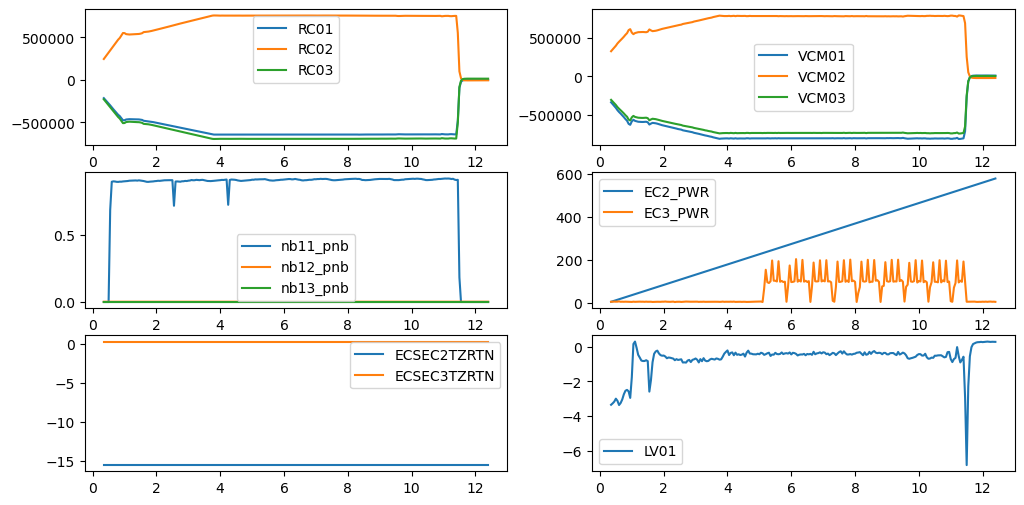

In [33]:
# monitoring arbitrary shot
shot_num = df.shot.unique()[-1]
shot_num = 21747
df_shot = df[df.shot == shot_num]

import matplotlib.pyplot as plt

print("shot num : {}".format(shot_num))

fig, axes = plt.subplots(3,2,figsize = (12,6))
axes = axes.ravel()

axes[0].plot(df_shot['time'], df_shot['\\RC01'], label = 'RC01')
axes[0].plot(df_shot['time'], df_shot['\\RC02'], label = 'RC02')
axes[0].plot(df_shot['time'], df_shot['\\RC03'], label = 'RC03')
axes[0].legend()

axes[1].plot(df_shot['time'], df_shot['\\VCM01'], label = 'VCM01')
axes[1].plot(df_shot['time'], df_shot['\\VCM02'], label = 'VCM02')
axes[1].plot(df_shot['time'], df_shot['\\VCM03'], label = 'VCM03')
axes[1].legend()

axes[2].plot(df_shot['time'], df_shot['\\nb11_pnb'], label = 'nb11_pnb')
axes[2].plot(df_shot['time'], df_shot['\\nb12_pnb'], label = 'nb12_pnb')
axes[2].plot(df_shot['time'], df_shot['\\nb13_pnb'], label = 'nb13_pnb')
axes[2].legend()

axes[3].plot(df_shot['time'], df_shot['\\EC2_PWR'], label = 'EC2_PWR')
axes[3].plot(df_shot['time'], df_shot['\\EC3_PWR'], label = 'EC3_PWR')
axes[3].legend()

axes[4].plot(df_shot['time'], df_shot['\\ECSEC2TZRTN'], label = 'ECSEC2TZRTN')
axes[4].plot(df_shot['time'], df_shot['\\ECSEC3TZRTN'], label = 'ECSEC3TZRTN')
axes[4].legend()

axes[5].plot(df_shot['time'], df_shot['\\LV01'], label = 'LV01')
axes[5].legend()

shot num : 21310


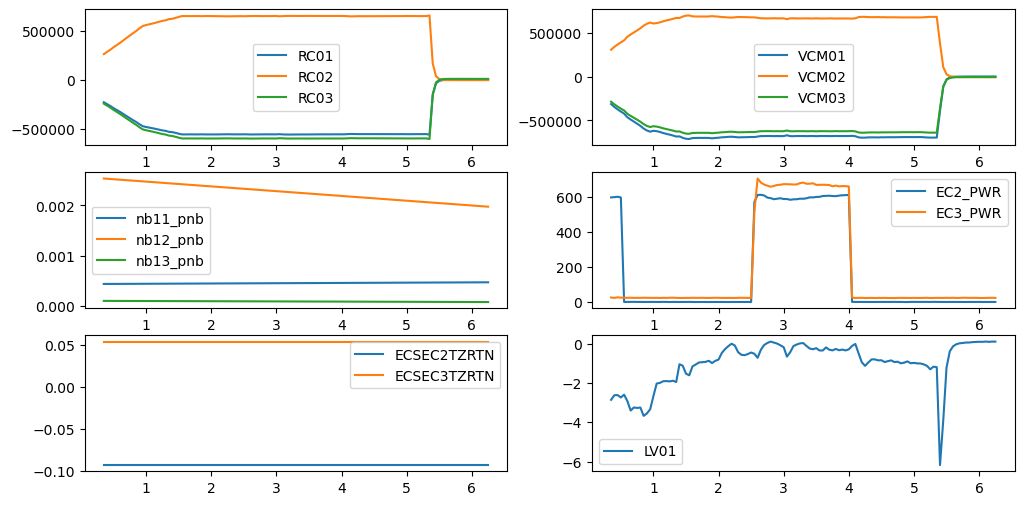

In [34]:
# monitoring arbitrary shot
shot_num = df.shot.unique()[-1]
shot_num = 21310
df_shot = df[df.shot == shot_num]

import matplotlib.pyplot as plt

print("shot num : {}".format(shot_num))

fig, axes = plt.subplots(3,2,figsize = (12,6))
axes = axes.ravel()

axes[0].plot(df_shot['time'], df_shot['\\RC01'], label = 'RC01')
axes[0].plot(df_shot['time'], df_shot['\\RC02'], label = 'RC02')
axes[0].plot(df_shot['time'], df_shot['\\RC03'], label = 'RC03')
axes[0].legend()

axes[1].plot(df_shot['time'], df_shot['\\VCM01'], label = 'VCM01')
axes[1].plot(df_shot['time'], df_shot['\\VCM02'], label = 'VCM02')
axes[1].plot(df_shot['time'], df_shot['\\VCM03'], label = 'VCM03')
axes[1].legend()

axes[2].plot(df_shot['time'], df_shot['\\nb11_pnb'], label = 'nb11_pnb')
axes[2].plot(df_shot['time'], df_shot['\\nb12_pnb'], label = 'nb12_pnb')
axes[2].plot(df_shot['time'], df_shot['\\nb13_pnb'], label = 'nb13_pnb')
axes[2].legend()

axes[3].plot(df_shot['time'], df_shot['\\EC2_PWR'], label = 'EC2_PWR')
axes[3].plot(df_shot['time'], df_shot['\\EC3_PWR'], label = 'EC3_PWR')
axes[3].legend()

axes[4].plot(df_shot['time'], df_shot['\\ECSEC2TZRTN'], label = 'ECSEC2TZRTN')
axes[4].plot(df_shot['time'], df_shot['\\ECSEC3TZRTN'], label = 'ECSEC3TZRTN')
axes[4].legend()

axes[5].plot(df_shot['time'], df_shot['\\LV01'], label = 'LV01')
axes[5].legend()

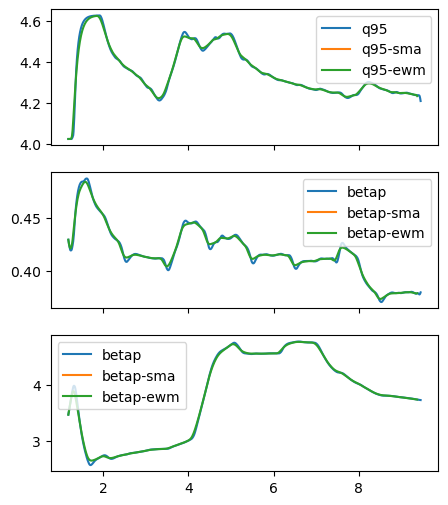

In [35]:
# check the effect of moving average
# SMA : simple moving average
# EWM : exponential moving average
# WMA : Weighted moving average

import numpy as np

def weighted_mean(arr : np.array):
    def inner(x):
        return (arr * x).mean()
    return inner

fig, axes = plt.subplots(3,1,figsize = (5,6), sharex = True)
axes = axes.ravel()

shot_num = df_extend.shot.unique()[-1]
shot_num = 17205
term = 8

df_shot = df_extend[df_extend.shot == shot_num]
df_shot_sma = df_shot.rolling(term).mean().dropna(axis = 0)
df_shot_ewm = df_shot.ewm(term).mean()

axes[0].plot(df_shot['time'], df_shot['\\q95'], label = 'q95')
axes[0].plot(df_shot_sma['time'], df_shot_sma['\\q95'], label = 'q95-sma')
axes[0].plot(df_shot_ewm['time'], df_shot_ewm['\\q95'], label = 'q95-ewm')
axes[0].legend()

axes[1].plot(df_shot['time'], df_shot['\\betap'], label = 'betap')
axes[1].plot(df_shot_sma['time'], df_shot_sma['\\betap'], label = 'betap-sma')
axes[1].plot(df_shot_ewm['time'], df_shot_ewm['\\betap'], label = 'betap-ewm')
axes[1].legend()

axes[2].plot(df_shot['time'], df_shot['\\ne_inter01'], label = 'betap')
axes[2].plot(df_shot_sma['time'], df_shot_sma['\\ne_inter01'], label = 'betap-sma')
axes[2].plot(df_shot_ewm['time'], df_shot_ewm['\\ne_inter01'], label = 'betap-ewm')
axes[2].legend()

In [3]:
print("shot number : {}".format(len(np.unique(df.shot))))

shot number : 969


In [9]:
# Scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df[cols_0D] = scaler.fit_transform(df[cols_0D])

In [14]:
df[cols_0D].head()

,\q0,\q95,\ipmhd,\kappa,\tritop,\tribot,\betap,\betan,\li,\WTOT_DLM03,\ne_inter01
0,-1.520824,2.278280,4.193905,-4.531642,-2.154318,-2.670414,-2.160409,-1.911145,43.495593,-0.949021,-0.731907
1,-1.520824,2.405547,3.917030,-4.243792,-2.290189,-2.577223,-1.735406,-1.648650,35.447995,-0.927358,-0.708762
2,-1.520824,2.532814,3.640155,-3.955944,-2.426059,-2.484032,-1.310403,-1.386154,27.400403,-0.904047,-0.671346
3,-1.520824,2.660080,3.363280,-3.668094,-2.561930,-2.390842,-0.885400,-1.123659,19.352810,-0.869313,-0.594547
4,-1.520824,2.787347,3.086405,-3.380246,-2.697801,-2.297651,-0.460396,-0.861163,11.305217,-0.832426,-0.568875


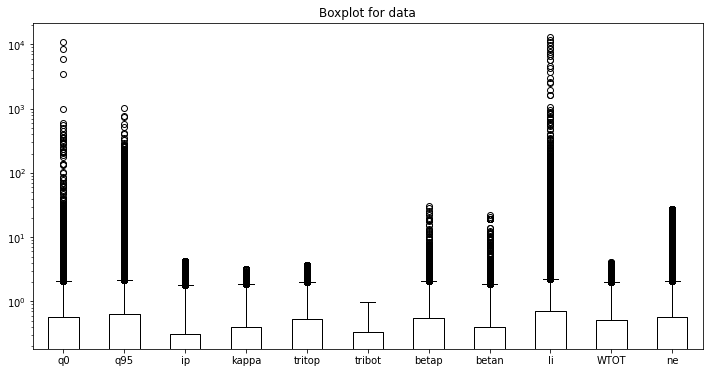

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

params_name = [
    'q0', 'q95', 'ip', 'kappa', 
    'tritop', 'tribot','betap','betan',
    'li', 'WTOT', 'ne',
]

fig,ax = plt.subplots(figsize = (12,6))
s = []

for col in cols_0D:
    s.append(df[col].dropna(axis = 0))
ax.boxplot(s)

plt.title('Boxplot for data')
plt.xticks([i + 1for i in range(len(cols_0D))], params_name)
plt.yscale('log', base = 10)
plt.show()

In [26]:
df[cols_0D].isna().sum()

\q0               0
\q95              0
\ipmhd            0
\kappa            0
\tritop           0
\tribot           0
\betap            0
\betan            0
\li               0
\WTOT_DLM03    5205
\ne_inter01    5447
dtype: int64

In [33]:
df[cols_0D[0:5]].describe()

,\q0,\q95,\ipmhd,\kappa,\tritop
count,162209.000000,162209.000000,162209.000000,162209.000000,162209.000000
mean,0.390426,0.532159,-0.129879,-0.298770,0.107503
std,38.503146,6.923714,1.078720,1.101322,1.052909
min,-1.520824,-2.529514,-5.235525,-6.436685,-5.949606
25%,-0.430636,-0.364525,-0.687693,-0.604792,-0.470654
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.569364,0.635475,0.312307,0.395208,0.529346
max,10880.989172,1034.240911,4.264548,3.248166,3.739080


In [34]:
df[cols_0D[5:]].describe()

,\tribot,\betap,\betan,\li,\WTOT_DLM03,\ne_inter01
count,162209.000000,162209.000000,162209.000000,162209.000000,157004.000000,156762.000000
mean,-0.335211,-0.021544,-0.137179,1.222604,-0.009388,0.221051
std,0.903199,7.857593,5.859874,77.741568,0.935068,2.931398
min,-5.349860,-1629.885537,-1405.730464,-3.095300,-5.965122,-26.960409
25%,-0.661292,-0.443196,-0.605664,-0.300305,-0.480075,-0.420000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.338708,0.556804,0.394336,0.699695,0.519925,0.580000
max,0.977083,30.062150,21.777914,12811.545906,4.182544,27.352145


In [44]:
df = pd.read_csv("./dataset/KSTAR_Disruption_ts_data.csv").reset_index()
shot_list = np.unique(df.shot)
df_shot = df[df.shot == shot_list[-1]]

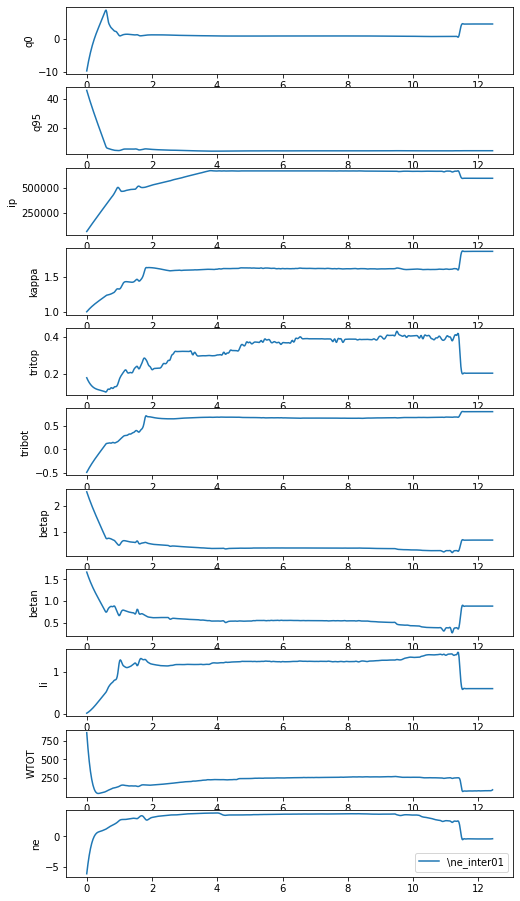

In [52]:
t_x = df_shot.time

fig, ax = plt.subplots(len(cols_0D),1, figsize = (8, 16))

for i, col in enumerate(cols_0D):
    if col == '\\ipmhd':
        ax[i].plot(t_x, df_shot[col], label = col)
    else:
        ax[i].plot(t_x, df_shot[col], label = col)
    ax[i].set_ylabel(params_name[i])
    
plt.legend()

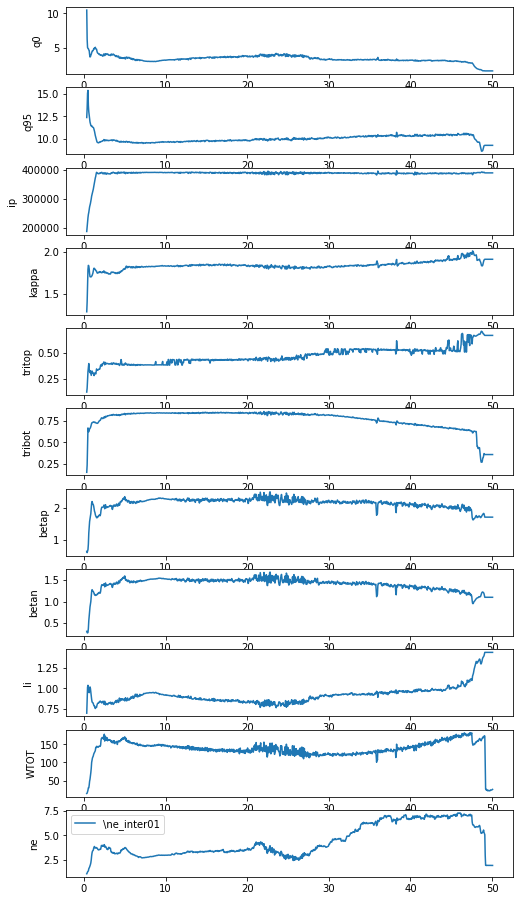

In [54]:
df_shot = df[df.shot == shot_list[-16]]
t_x = df_shot.time

fig, ax = plt.subplots(len(cols_0D),1, figsize = (8, 16))

for i, col in enumerate(cols_0D):
    if col == '\\ipmhd':
        ax[i].plot(t_x, df_shot[col].abs(), label = col)
    else:
        ax[i].plot(t_x, df_shot[col], label = col)
    ax[i].set_ylabel(params_name[i])
    
plt.legend()

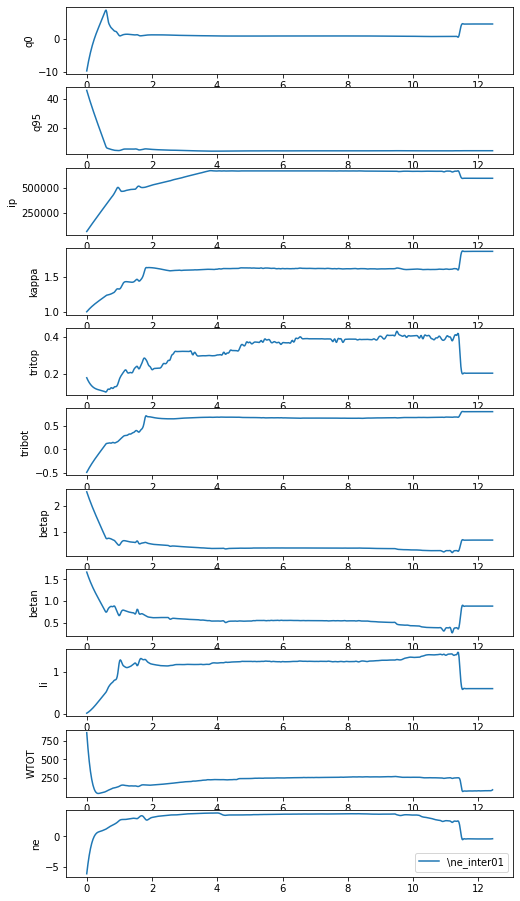

In [55]:
df_extend = pd.read_csv("./dataset/KSTAR_Disruption_ts_data_extend.csv").reset_index()
shot_list = np.unique(df_extend.shot)
df_shot = df_extend[df_extend.shot == shot_list[-1]]

t_x = df_shot.time

fig, ax = plt.subplots(len(cols_0D),1, figsize = (8, 16))

for i, col in enumerate(cols_0D):
    if col == '\\ipmhd':
        ax[i].plot(t_x, df_shot[col].abs(), label = col)
    else:
        ax[i].plot(t_x, df_shot[col], label = col)
    ax[i].set_ylabel(params_name[i])
    
plt.legend()

<AxesSubplot:xlabel='\\ne_tci01', ylabel='Probability'>

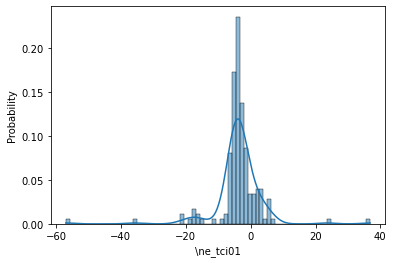

In [61]:
import seaborn as sns
shot_num = 21747
shot_data = df[df.shot == shot_num]
tftsrt = df_disruption[df_disruption.shot == shot_num].tftsrt.values.item()
sns.histplot(data = shot_data[shot_data['time'] > tftsrt], x = '\\ne_tci01', kde = True, stat = 'probability', discrete = False, common_norm = False)

/tmp/ipykernel_1966344/713098904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_data['state'] = ['Ramp-up' if x < tftsrt else 'Flat-top' for x in shot_data['time'] ]


(2.0, 8.0)

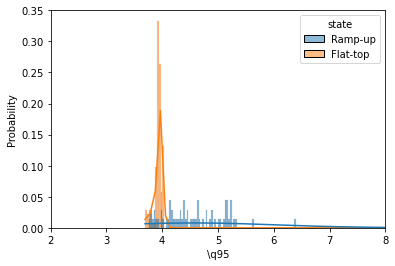

In [67]:
import matplotlib.pyplot as plt

shot_data['state'] = ['Ramp-up' if x < tftsrt else 'Flat-top' for x in shot_data['time'] ]

sns.histplot(data = shot_data, hue = 'state', x = '\\q95', kde = True, stat = 'probability', discrete = False, common_norm = False)
plt.xlim([2,8])

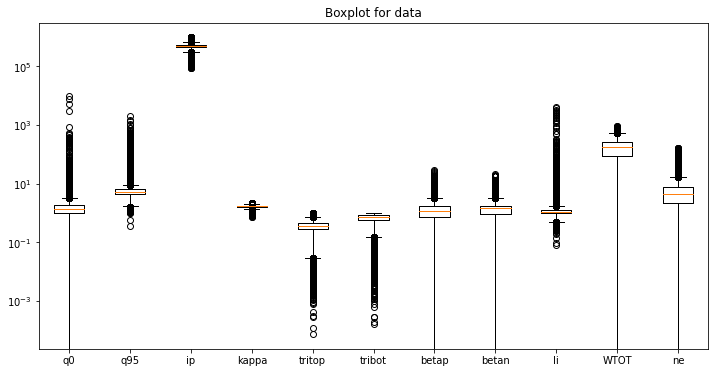

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

params_name = [
    'q0', 'q95', 'ip', 'kappa', 
    'tritop', 'tribot','betap','betan',
    'li', 'WTOT', 'ne',
]
df = pd.read_csv("./dataset/KSTAR_Disruption_ts_data.csv").reset_index()
df['\\ipmhd'] = df['\\ipmhd'].abs().values
fig,ax = plt.subplots(figsize = (12,6))
s = []

for col in cols_0D:
    s.append(df[col].dropna(axis = 0))
ax.boxplot(s)

plt.title('Boxplot for data')
plt.xticks([i + 1for i in range(len(cols_0D))], params_name)
plt.yscale('log', base = 10)
plt.show()

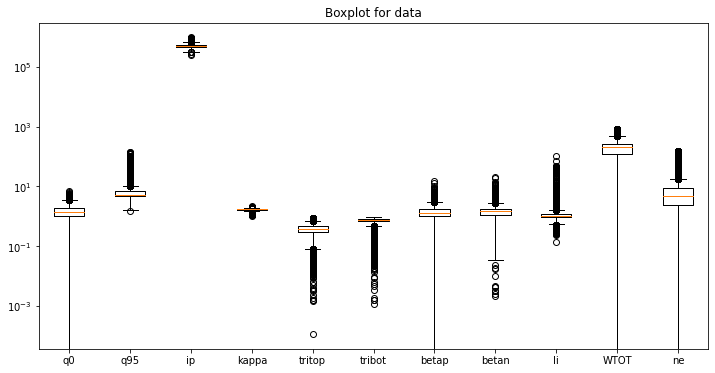

In [81]:
df_flat = pd.DataFrame({})

for shot in np.unique(df.shot.values):
    
    if shot not in np.unique(df_disruption.shot.values):
        continue
    tftsrt = df_disruption[df_disruption.shot == shot].tftsrt.values.item() * 1.5
    tipminf = df_disruption[df_disruption.shot == shot].tipminf.values.item() * 0.95
    df_shot = df[df.shot == shot]
    df_flat = pd.concat([df_flat, df_shot[(df_shot.time > tftsrt) & (df_shot.time < tipminf)]])
    
fig,ax = plt.subplots(figsize = (12,6))
s = []

for col in cols_0D:
    s.append(df_flat[col].dropna(axis = 0))
ax.boxplot(s)

plt.title('Boxplot for data')
plt.xticks([i + 1for i in range(len(cols_0D))], params_name)
plt.yscale('log', base = 10)
plt.show()

In [82]:
df_flat[cols_0D].describe()

,\q0,\q95,\ipmhd,\kappa,\tritop,\tribot,\betap,\betan,\li,\WTOT_DLM03,\ne_inter01
count,99302.000000,99302.000000,99302.000000,99302.000000,99302.000000,99302.000000,99302.000000,99302.000000,99302.000000,95756.000000,95285.000000
mean,1.492579,6.042518,500373.285083,1.709533,0.406672,0.710587,1.345457,1.413759,1.139589,185.698614,5.764073
std,1.006717,2.751079,91072.418542,0.117467,0.150611,0.180283,0.676929,0.667586,0.781086,174.426524,17.323039
min,0.000000,1.491009,255735.453125,1.062984,-0.182462,-0.479648,-37.375633,-29.187229,0.135620,-884.889832,-137.191071
25%,0.993714,4.832880,461580.007812,1.670747,0.311431,0.689001,1.024508,1.098246,0.959017,120.525467,2.387565
50%,1.397730,5.377840,488489.375000,1.726157,0.377787,0.754345,1.317742,1.498250,1.035986,202.045837,4.849455
75%,1.964353,6.957626,552431.343750,1.779314,0.465998,0.832772,1.819306,1.812554,1.245384,270.777557,8.568748
max,6.934634,143.498032,966119.687500,2.172460,0.914578,0.943144,15.789760,20.521006,107.635742,867.520996,153.018738


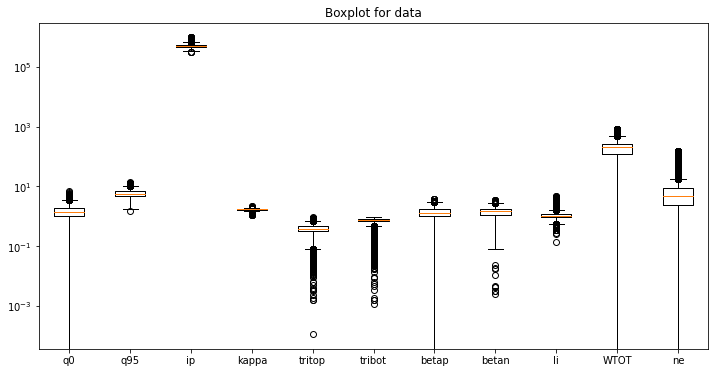

In [83]:
df_flat = pd.DataFrame({})

for shot in np.unique(df.shot.values):
    
    if shot not in np.unique(df_disruption.shot.values):
        continue
    
    tftsrt = df_disruption[df_disruption.shot == shot].tftsrt.values.item() * 1.5
    tipminf = df_disruption[df_disruption.shot == shot].tipminf.values.item() * 0.95
    df_shot = df[df.shot == shot]
    df_shot = df_shot[(df_shot.time > tftsrt) & (df_shot.time < tipminf)]
    
    for col in cols_0D:
        q1 = df_shot[col].quantile(0.25)
        q3 = df_shot[col].quantile(0.75)
        
        IQR = q3 - q1
        whisker_width = 1.5      
        
        lower_whisker = q1 - whisker_width * IQR
        upper_whisker = q3 + whisker_width * IQR
        
        df_shot.loc[:,col] = np.where(df_shot[col]>upper_whisker, upper_whisker, np.where(df_shot[col]<lower_whisker,lower_whisker, df_shot[col]))

    df_flat = pd.concat([df_flat, df_shot])
    
fig,ax = plt.subplots(figsize = (12,6))
s = []

for col in cols_0D:
    s.append(df_flat[col].dropna(axis = 0))
ax.boxplot(s)

plt.title('Boxplot for data')
plt.xticks([i + 1for i in range(len(cols_0D))], params_name)
plt.yscale('log', base = 10)
plt.show()        

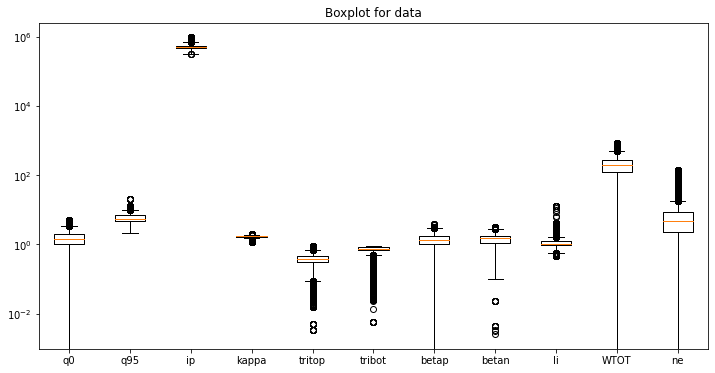

In [97]:
from scipy.stats.mstats import winsorize

df_flat = pd.DataFrame({})

for shot in np.unique(df.shot.values):
    
    if shot not in np.unique(df_disruption.shot.values):
        continue
    
    tftsrt = df_disruption[df_disruption.shot == shot].tftsrt.values.item() * 1.5
    tipminf = df_disruption[df_disruption.shot == shot].tipminf.values.item() * 0.95
    
    if tipminf < tftsrt:
        continue
    
    df_shot = df[df.shot == shot]
    df_shot = df_shot[(df_shot.time > tftsrt) & (df_shot.time < tipminf)]
    
    if len(df_shot) == 0:
        continue
    
    for col in cols_0D:
        df_shot[col] = winsorize(df_shot[col].values, limits = [0.1, 0.1]).data

    df_flat = pd.concat([df_flat, df_shot])
    
fig,ax = plt.subplots(figsize = (12,6))
s = []

for col in cols_0D:
    s.append(df_flat[col].dropna(axis = 0))
ax.boxplot(s)

plt.title('Boxplot for data')
plt.xticks([i + 1for i in range(len(cols_0D))], params_name)
plt.yscale('log', base = 10)
plt.show()        

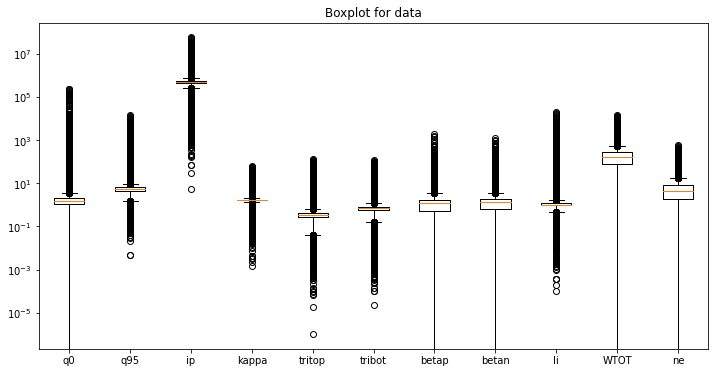

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

params_name = [
    'q0', 'q95', 'ip', 'kappa', 
    'tritop', 'tribot','betap','betan',
    'li', 'WTOT', 'ne',
]
df = pd.read_csv("./dataset/KSTAR_Disruption_ts_data_extend.csv").reset_index()
df['\\ipmhd'] = df['\\ipmhd'].abs().values
fig,ax = plt.subplots(figsize = (12,6))
s = []

for col in cols_0D:
    s.append(df[col].dropna(axis = 0))
ax.boxplot(s)

plt.title('Boxplot for data')
plt.xticks([i + 1for i in range(len(cols_0D))], params_name)
plt.yscale('log', base = 10)
plt.show()

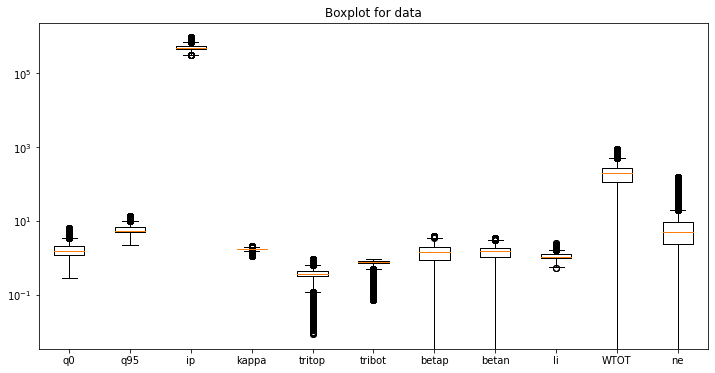

In [79]:
df_flat = pd.DataFrame({})

for shot in np.unique(df.shot.values):
    
    if shot not in np.unique(df_disruption.shot.values):
        continue
    tftsrt = df_disruption[df_disruption.shot == shot].tftsrt.values.item() * 1.5
    tipminf = df_disruption[df_disruption.shot == shot].tipminf.values.item() * 0.95
    df_shot = df[df.shot == shot]
    df_flat = pd.concat([df_flat, df_shot[(df_shot.time > tftsrt) & (df_shot.time < tipminf)]])
    
fig,ax = plt.subplots(figsize = (12,6))
s = []

for col in cols_0D:
    s.append(df_flat[col].dropna(axis = 0))
ax.boxplot(s)

plt.title('Boxplot for data')
plt.xticks([i + 1for i in range(len(cols_0D))], params_name)
plt.yscale('log', base = 10)
plt.show()

<AxesSubplot:>

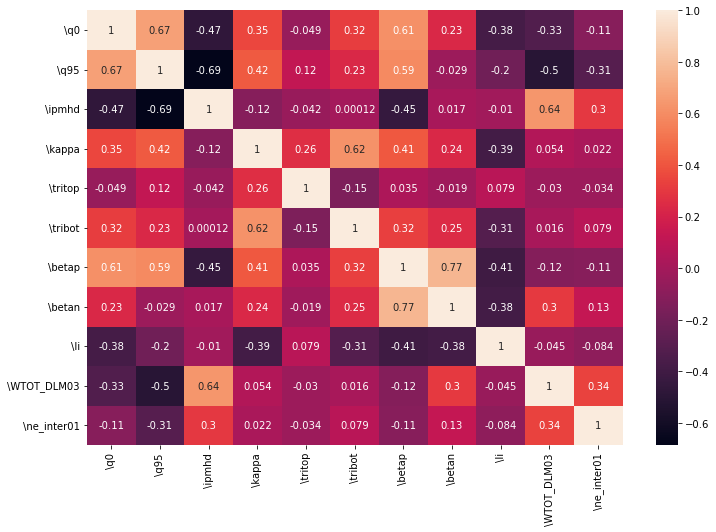

In [103]:
plt.figure(figsize = (12,8))
sns.heatmap(df_flat[cols_0D].corr(), annot = True)

In [107]:
from statsmodels.tsa.stattools import adfuller

shot = 21747
df_shot = df_flat[df_flat.shot == shot]
result = adfuller(df_shot[cols_0D[0]], autolag='AIC')

print('Test statistic: ' , result[0])
print('p-value: '  ,result[1])
print('Critical Values:' ,result[4])

Test statistic:  0.6621669653923566
p-value:  0.9890518015332157
Critical Values: {'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}


In [108]:
for col in cols_0D:
    result = adfuller(df_shot[col], autolag='AIC')
    print('col : {}, p-value: {}'.format(col, result[1]))

col : \q0, p-value: 0.9890518015332157
col : \q95, p-value: 0.2471782778424073
col : \ipmhd, p-value: 0.9520207332750216
col : \kappa, p-value: 0.302143537688415
col : \tritop, p-value: 0.23285530737387528
col : \tribot, p-value: 0.8743377900869398
col : \betap, p-value: 0.9960498315688024
col : \betan, p-value: 0.9948466426667564
col : \li, p-value: 0.9952516079265417
col : \WTOT_DLM03, p-value: 0.6825520725286149
col : \ne_inter01, p-value: 0.9990660214744999


In [ ]:
cols = cols_0D
cols = ['shot'] + cols

dict_data = {}

for col in cols:
    dict_data[col] = []

for shot in np.unique(df_flat.shot.values):
    df_shot = df_flat[df_flat.shot == shot]
    
    for col in cols_0D:
        result = adfuller(df_shot[col], autolag='AIC')
        dict_data[col].append(result[1])
        
    print('col : {}, p-value: {}'.format(col, result[1]))